In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


In [3]:
print("#### DENSE 1 ####\n")
dense1.info()

#### DENSE 1 ####

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[ 0.00956133 -0.02435852 -0.10613491  0.0504558 ]
 [-0.03072243 -0.11994042 -0.30243665 -0.09745669]
 [-0.08823618 -0.12136607  0.04769631  0.06698482]
 [ 0.16431889 -0.0457849  -0.11433522 -0.07421001]
 [-0.00829856  0.10593113 -0.05364516  0.14629172]
 [ 0.01161029 -0.13138505  0.0189694  -0.06709816]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[-0.13052528 -2.81055956  0.30077432 -1.04828315  1.349596   -0.87997102]
 [-0.11964565 -2.65522189  0.22686881 -1.05906242  1.36038756 -0.92740431]
 [ 0.04651604 -1.12889074 -0.26905309 -0.13773275  0.82856872 -0.61455266]]



In [4]:
print("#### ACTIVATION 1 ####\n")
activation1.info()

#### ACTIVATION 1 ####

Inputs:
[[-0.13052528 -2.81055956  0.30077432 -1.04828315  1.349596   -0.87997102]
 [-0.11964565 -2.65522189  0.22686881 -1.05906242  1.36038756 -0.92740431]
 [ 0.04651604 -1.12889074 -0.26905309 -0.13773275  0.82856872 -0.61455266]]

Outputs:
[[0.         0.         0.30077432 0.         1.349596   0.        ]
 [0.         0.         0.22686881 0.         1.36038756 0.        ]
 [0.04651604 0.         0.         0.         0.82856872 0.        ]]



In [5]:
print("#### DENSE 2 ####\n")
dense2.info()

#### DENSE 2 ####

Inputs:
[[0.         0.         0.30077432 0.         1.349596   0.        ]
 [0.         0.         0.22686881 0.         1.36038756 0.        ]
 [0.04651604 0.         0.         0.         0.82856872 0.        ]]

Weights:
[[ 0.06293104  0.14783979  0.0646155  -0.06332247  0.08180661 -0.02438862]
 [ 0.1484175  -0.12643645  0.05166159 -0.0354179  -0.03994475 -0.14500642]
 [ 0.18286583  0.19604524 -0.06204685  0.0718533  -0.03760426 -0.08383497]]

Biases:
[0. 0. 0.]

Outputs:
[[ 0.12984055 -0.03837079 -0.06941266]
 [ 0.12594793 -0.04261993 -0.06523287]
 [ 0.0707097  -0.02619317 -0.02265152]]



In [6]:
print("#### ACTIVATION 2 ####\n")
activation2.info()

#### ACTIVATION 2 ####

Inputs:
[[ 0.12984055 -0.03837079 -0.06941266]
 [ 0.12594793 -0.04261993 -0.06523287]
 [ 0.0707097  -0.02619317 -0.02265152]]

Outputs:
[[0.12528694 0.10588942 0.1026529 ]
 [0.1248002  0.10544043 0.10308287]
 [0.11809339 0.10718678 0.10756707]]



In [7]:
print("#### LOSS ####\n")
print(loss1, loss2)

#### LOSS ####

2.1968751583532717 2.1968751583532717


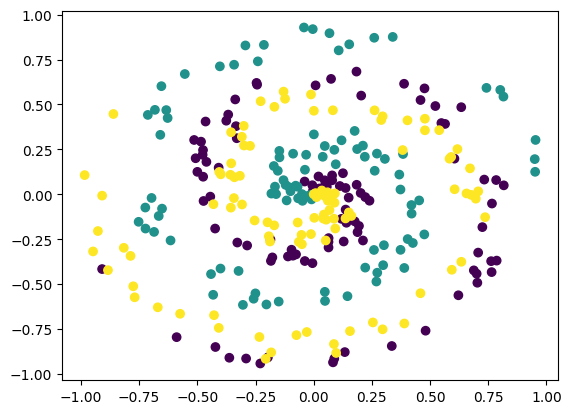

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

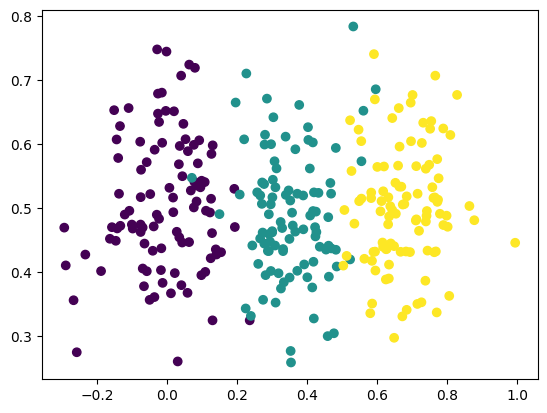

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 6.802458212621822
acc: 0.3333333333333333


In [11]:
dense1.dweights

array([[-0.00524176, -0.00180123],
       [ 0.00892364, -0.00656609],
       [ 0.00044132, -0.01735697],
       [ 0.00219435,  0.01375866]])

In [12]:
dense1.dbiases

array([-0.00728224,  0.03601274,  0.05200926, -0.04323495])

In [13]:
dense2.dweights

array([[-0.00293396, -0.00537118, -0.00223947, -0.00670518],
       [-0.00179895, -0.00286727, -0.00158329, -0.00514635],
       [-0.00175169, -0.00358056, -0.00231499, -0.0075715 ]])

In [14]:
dense2.dbiases

array([-0.33222211, -0.3322193 , -0.33222525])